In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 52 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Name                                                                                                                                               21256 non-null  object 
 1   Age                                                                                                                                                21256 non-null  object 
 2   Gender                                                                                                                                             21256 non-null  object 
 3   Type o

In [4]:
df.isna().sum()

Name                                                                                                                                                    0
Age                                                                                                                                                     0
Gender                                                                                                                                                  0
Type of Graduation/Post Graduation                                                                                                                      0
Marital status                                                                                                                                          0
Mode of interview given by candidate?                                                                                                                   0
Pre Interview Check                                                         

In [5]:
df.columns = df.columns.str.strip()\
    .str.replace(r"[\/\?\*\-\\.,]", "", regex=True)\
    .str.replace(" ", "_")\
    .str.lower()

In [6]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduationpost_graduation',
       'marital_status', 'mode_of_interview_given_by_candidate',
       'pre_interview_check', 'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english',
       'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate__(experience_in_months)'

In [7]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english': 'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying' : 'has_acquaintance_in_company',
                   "but_my_child's_exam_are_going_on_now_so_we_will_keep_the_counselling_session_after_the_exams_get_over(time:_favourable_pitch:_counsellor_hype)" : "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app": "being_in_education_industry_be_selling_the_app",
                  }, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 52 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   name                                                    21256 non-null  object 
 1   age                                                     21256 non-null  object 
 2   gender                                                  21256 non-null  object 
 3   type_of_graduationpost_graduation                       21256 non-null  object 
 4   marital_status                                          21256 non-null  object 
 5   mode_of_interview_given_by_candidate                    21256 non-null  object 
 6   pre_interview_check                                     21256 non-null  object 
 7   fluency_in_english_based_on_introduction                21256 non-null  object 
 8   confidence_based_on_introduction_(en

In [9]:
df.shape

(21256, 52)

In [10]:
columns_to_drop = df.columns[8:18]
print("Dropping the following columns:")
print(columns_to_drop)

Dropping the following columns:
Index(['confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario'],
      dtype='object')


In [11]:
# Dropping the columns
df = df.drop(columns=columns_to_drop)
df.shape

(21256, 42)

In [12]:
df.duplicated().sum()

2

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df.dropna(inplace=True)
df.shape

(18681, 42)

In [15]:
df.isna().sum()

name                                                      0
age                                                       0
gender                                                    0
type_of_graduationpost_graduation                         0
marital_status                                            0
mode_of_interview_given_by_candidate                      0
pre_interview_check                                       0
fluency_in_english_based_on_introduction                  0
mother_tongue_influence                                   0
has_acquaintance_in_company                               0
candidate_status                                          0
last_fixed_ctc_(lakhs)                                    0
currently_employed                                        0
experienced_candidate__(experience_in_months)             0
experienced_candidate_(nature_of_work)                    0
what_was_the_type_of_role                                 0
how_many_slides_candidate_have_submitted

In [16]:
df['whether_joined_the_company_or_not'] = df['whether_joined_the_company_or_not'].map({'Joined': 1, 'Yes':1, 'No':0, 'Not Joined': 0})

# Age visuals

In [17]:
df['age'].value_counts().sort_index()

age
20      445
21     1747
22     3605
23     3037
24     2689
25     1895
26     1523
27     1154
28      908
29      651
30      522
31      363
32      121
32+      21
Name: count, dtype: int64

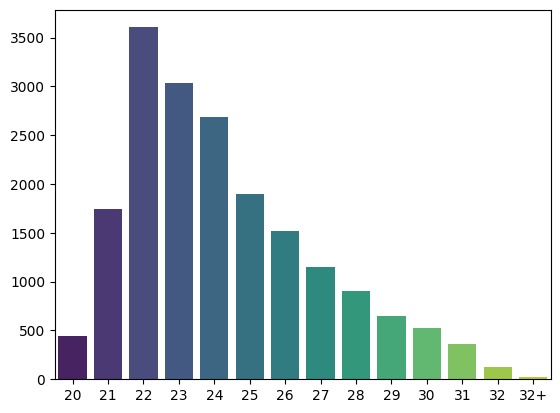

In [18]:
age_counts = {
    '20': 445, '21': 1747, '22': 3605, '23': 3037, '24': 2689, '25': 1895, '26': 1523, 
    '27': 1154, '28': 908, '29': 651, '30': 522, '31': 363, '32': 121, '32+': 21
}
age_series = pd.Series(age_counts)
sns.barplot(x=age_series.index, y=age_series.values, palette="viridis")
plt.show()

In [19]:
# Convert to int
df['age'] = df['age'].replace('32+', '32').astype(int)

In [20]:
bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-60', '60+']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [21]:
df['age'].unique()

['25-27', '28-30', '22-24', '20-21', '31-60']
Categories (7, object): ['0-19' < '20-21' < '22-24' < '25-27' < '28-30' < '31-60' < '60+']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


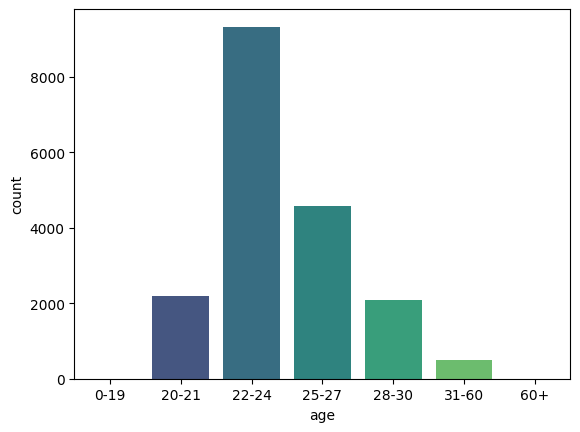

In [22]:
sns.countplot(x=df['age'], palette="viridis", order=labels)
plt.show()

In [23]:
df['type_of_graduationpost_graduation']

0        Masters in data science
1                     BSc or MSc
2                   B.E / B-Tech
3                   B.E / B-Tech
4                          BA/MA
                  ...           
21248                 BSc or MSc
21251               B.E / B-Tech
21252                      B.ARC
21253               B.E / B-Tech
21255                        MBA
Name: type_of_graduationpost_graduation, Length: 18681, dtype: object

In [24]:
df['type_of_graduationpost_graduation'].unique()

array(['Masters in data science', 'BSc or MSc', 'B.E / B-Tech', 'BA/MA',
       'B.ed(Teaching)', 'M.E / M-Tech', 'B.com (Bachelor of commerce)',
       'MED', 'M.com', 'MBA', 'BCA/MCA',
       'B.comm (Bachelor of mass comm.)', 'BBA or BBM',
       'Hotel Management', 'PG diploma ', 'B.pharma/M.pharma', 'PGDM',
       'Bachelor in dental', 'pgdm', 'Bachelor in medical lab', 'Pgdm',
       'master maas comm', 'BE - CSe and CDAC ',
       'Bachelors in fisheries in science', 'LLM', 'PHD ', 'BMS',
       'B-pharma', 'bachlors in journalism-2021', 'msw-hr-2014', 'MS',
       'LLB', 'Mphil', 'b.com and pgdc , ', 'bachelor mass communication',
       'PG(Bachelor of Library Science)', 'MMC', 'MASTER IN MANGEMENT ',
       'pgdm ', 'M Phil', 'PGPM', 'PGPCEM', 'BA in French', 'B-pharm ',
       'PHARMA D', 'MJMC 2020', 'bms ', 'PGPM in marketing', 'MSW',
       'mass media', 'Bachelor of Tourism', 'MASTERS IN DESIGN ',
       'mass comm', 'Bled', 'msw', 'English Honors', 'mass com',
       'M

In [25]:
df['type_of_graduationpost_graduation'].value_counts()

type_of_graduationpost_graduation
B.E / B-Tech                    6551
BSc or MSc                      3019
B.com (Bachelor of commerce)    2044
BA/MA                           2033
MBA                             1571
                                ... 
BMM ( MAss Media)                  1
D.el.ed                            1
B.Physiotherapist                  1
B.ED                               1
B.ARC                              1
Name: count, Length: 224, dtype: int64

In [26]:

# # Normalize column by lowercasing & mapping known degrees
# df['type_of_graduation/post_graduation'] = df['type_of_graduation/post_graduation'].str.lower()
# df['category'] = df['type_of_graduation/post_graduation'].map(degree_mapping).fillna('Other')

# # Function to categorize qualifications
# def categorize_qualification(qualification):
#     qualification = qualification.lower()
#     if any(x in qualification for x in ['masters', 'mcom', 'msc', 'mtech', 'mba', 'pgdm', 'mphil', 'ms']):
#         return 'Postgraduate Degrees'
#     elif any(x in qualification for x in ['bsc', 'bcom', 'bba', 'btech', 'bca', 'ba', 'bds', 'bmm']):
#         return 'Undergraduate Degrees'
#     elif 'phd' in qualification:
#         return 'Doctoral Degrees'
#     elif 'diploma' in qualification or 'pgd' in qualification:
#         return 'Diplomas and Certifications'
#     elif 'voc' in qualification:
#         return 'Vocational and Technical Qualifications'
#     elif any(x in qualification for x in ['mbbs', 'llb', 'bpharma', 'bachelor in dental']):
#         return 'Professional and Specialized Qualifications'
#     elif any(x in qualification for x in ['management', 'business', 'finance']):
#         return 'Management and Business-related Qualifications'
#     else:
#         return 'Other Qualifications'

# # Apply function to create another classification column
# df['qualification_category'] = df['type_of_graduation/post_graduation'].apply(categorize_qualification)

# # Display results
# print(df[['type_of_graduation/post_graduation', 'category', 'qualification_category']])
# print("\nCategory Counts:\n", df['category'].value_counts())


In [27]:
import pandas as pd

# Degree to category mapping
degree_mapping = {
    'B.E / B-Tech': 'Engineering',
    'M.E / M-Tech': 'Engineering',
    
    'BSc or MSc': 'Science',
    'BCA/MCA': 'Science',
    'MS': 'Science',
    'Mphil': 'Science',
    'B.com (Bachelor of commerce)': 'Commerce & Management',
    'M.com': 'Commerce & Management',
    'BBA or BBM': 'Commerce & Management',
    'MBA': 'Commerce & Management',
    'PGDM': 'Commerce & Management',
    'PGDCA': 'Commerce & Management',
    'BMS': 'Commerce & Management',
    'BA/MA': 'Arts & Humanities',
    'BJMC': 'Arts & Humanities',
    'PHD ': 'Arts & Humanities',
    'LLB': 'Law',
    'B.pharma/M.pharma': 'Pharmacy & Medical',
    'B.ed(Teaching)': 'Teaching & Education',
    'Hotel Management': 'Hotel Management',
    'B.comm (Bachelor of mass comm.)': 'Mass Communication',
    'BVOC': 'Vocational Studies',
    'PG diploma': 'Diploma',
    'PGD': 'Diploma'
}



# Map the categories & assign "Other" to unknown degrees
df['category'] = df['type_of_graduationpost_graduation'].map(degree_mapping).fillna('Other')

# Display counts for each category
print(df['category'].value_counts())


# df_degrees['type_of_graduationpost_graduation'] = df_degrees['type_of_graduationpost_graduation'].map(degree_mapping).fillna('Other')

category
Engineering              6762
Commerce & Management    5021
Science                  4188
Arts & Humanities        2036
Other                     248
Pharmacy & Medical        141
Teaching & Education      137
Hotel Management           69
Mass Communication         68
Vocational Studies          6
Law                         4
Diploma                     1
Name: count, dtype: int64


In [28]:
# Define a mapping dictionary
degree_mapping = {
    'B.E / B-Tech': 'Engineering',
    'M.E / M-Tech': 'Engineering',
    'BSc or MSc': 'Science',
    'BCA/MCA': 'Science',
    'BCS': 'Science',
    'B.com (Bachelor of commerce)': 'Commerce & Management',
    'M.com': 'Commerce & Management',
    'BBA or BBM': 'Commerce & Management',
    'MBA': 'Commerce & Management',
    'PGDM': 'Commerce & Management',
    'PGDCA': 'Commerce & Management',
    'BMS': 'Commerce & Management',
    'BA/MA': 'Arts & Humanities',
    'MSW': 'Arts & Humanities',
    'B.pharma/M.pharma': 'Pharmacy & Medical',
    'B.ed(Teaching)': 'Teaching & Education',
    'Hotel Management': 'Hotel Management',
    'B.comm (Bachelor of mass comm.)': 'Mass Communication',
    'BVOC': 'Vocational Studies'
}

#mapping & "Other" to unknown categories
df['type_of_graduationpost_graduation'] = df['type_of_graduationpost_graduation'].map(degree_mapping).fillna('Other')
df['type_of_graduationpost_graduation'].value_counts()

type_of_graduationpost_graduation
Engineering              6762
Commerce & Management    5021
Science                  4190
Arts & Humanities        2043
Other                     244
Pharmacy & Medical        141
Teaching & Education      137
Hotel Management           69
Mass Communication         68
Vocational Studies          6
Name: count, dtype: int64

In [29]:
df["type_of_graduationpost_graduation"].value_counts().head(50)

type_of_graduationpost_graduation
Engineering              6762
Commerce & Management    5021
Science                  4190
Arts & Humanities        2043
Other                     244
Pharmacy & Medical        141
Teaching & Education      137
Hotel Management           69
Mass Communication         68
Vocational Studies          6
Name: count, dtype: int64

In [30]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [35]:
df["gender"].value_counts()

gender
0    14864
1     3817
Name: count, dtype: int64

In [36]:
df = pd.get_dummies(df, columns=['marital_status'])

KeyError: "None of [Index(['marital_status'], dtype='object')] are in the [columns]"

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 21255
Data columns (total 45 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   name                                                    18681 non-null  object  
 1   age                                                     18681 non-null  category
 2   gender                                                  18681 non-null  int64   
 3   type_of_graduationpost_graduation                       18681 non-null  object  
 4   mode_of_interview_given_by_candidate                    18681 non-null  object  
 5   pre_interview_check                                     18681 non-null  object  
 6   fluency_in_english_based_on_introduction                18681 non-null  object  
 7   mother_tongue_influence                                 18681 non-null  object  
 8   has_acquaintance_in_company    

In [39]:
df = pd.get_dummies(df, columns=['mode_of_interview_given_by_candidate'])

In [40]:
df['pre_interview_check'].value_counts()

pre_interview_check
Proceed with the Interview    18678
Option 4                          2
I                                 1
Name: count, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18681 entries, 0 to 21255
Data columns (total 45 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   name                                                    18681 non-null  object  
 1   age                                                     18681 non-null  category
 2   gender                                                  18681 non-null  int64   
 3   type_of_graduationpost_graduation                       18681 non-null  object  
 4   mode_of_interview_given_by_candidate                    18681 non-null  object  
 5   pre_interview_check                                     18681 non-null  object  
 6   fluency_in_english_based_on_introduction                18681 non-null  object  
 7   mother_tongue_influence                                 18681 non-null  object  
 8   has_acquaintance_in_company    

In [ ]:
df['company_and_has_spoken_before_applying?'] = df['company_and_has_spoken_before_applying'].map({'Yes': 1, 'No': 0})

In [ ]:
df['candidate_status'].value_counts()

In [ ]:
df['last_fixed_ctc_(lakhs)'].unique()

In [ ]:
df['last_fixed_ctc_(lakhs)'].value_counts()

In [ ]:
ctc_mapping = {'Fresher': 0,
               '0-1.99': 1,
               '2-2.99': 2.5,
               '3-3.99': 3.5,
               '4-4.99': 4.5,
               '5-5.99': 5.5,
               '6-6.99': 6.5,
               '7+': 7
              }
df['last_fixed_ctc_(lakhs)'] = df['last_fixed_ctc_(lakhs)'].map(ctc_mapping)

In [ ]:
df['last_fixed_ctc_(lakhs)'].head(10)

In [ ]:
df['last_fixed_ctc_(lakhs)'].value_counts()

In [ ]:
df['currently_employed'].unique()

In [ ]:
df['currently_employed'] = df['currently_employed'].map({'Yes': 1, 'No': 0})

In [ ]:
df.shape

#implement

In [ ]:
df['experienced_candidate_-_(experience_in_months)'].value_counts()

In [ ]:
df['experienced_candidate_(nature_of_work)'].unique()

In [ ]:
df['experienced_candidate_(nature_of_work)'].value_counts().head(30)

In [ ]:
df['what_was_the_type_of_role?'].unique()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Fresher', 'Individual Contributor', 'Team Handling']])
df['what_was_the_type_of_role?'] = ordinal_encoder.fit_transform(df[['what_was_the_type_of_role?']])

In [ ]:
df['call-pitch_elements_used_during_the_call_sales_scenario'].value_counts()

In [ ]:
df['father_reply'].value_counts()

In [ ]:
df['role_location_to_be_given_to_the_candidate'].unique()

In [ ]:
df['interview_verdict'].value_counts().head(20)

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['interview_verdict'])
df_one_hot

In [ ]:
df['role_location_to_be_given_to_the_candidate'].value_counts().head(20)

In [ ]:
df['let_me_discuss_it_with_my_child'].unique()

In [ ]:
df['redflags_comments_in_interview'].value_counts().head(1)

In [ ]:
df['comments'].value_counts()